# 머신러닝 문장분류

<iframe style="border:none" width="800" height="450" src="https://whimsical.com/embed/RCCrWptFJ2dx7Y4uDUG4XT"></iframe>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

plt.rc('font', family='NanumMyeongjoOTF') # For MacOS
print(plt.rcParams['font.family'])

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'


['NanumMyeongjoOTF']


In [2]:
sentence_df = pd.read_csv('./open/train.csv')
sentence_df

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,"＇신동덤＇은 ＇신비한 동물사전＇과 ＇해리 포터＇ 시리즈를 잇는 마법 어드벤처물로, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,"수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목, 어깨, 팔꿈치, ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 ＂계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,1만명이 넘는 방문자수를 기록한 이번 전시회는 총 77개 작품을 넥슨 사옥을 그대로...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [3]:
sentence_df.isnull().sum()

ID       0
문장       0
유형       0
극성       0
시제       0
확실성      0
label    0
dtype: int64

In [4]:
sentence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      16541 non-null  object
 1   문장      16541 non-null  object
 2   유형      16541 non-null  object
 3   극성      16541 non-null  object
 4   시제      16541 non-null  object
 5   확실성     16541 non-null  object
 6   label   16541 non-null  object
dtypes: object(7)
memory usage: 904.7+ KB


## 불용어 설정

In [5]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt", header=None)[0].tolist()
# stopwords

## WordCloud로 자주 나오는 단어 확인

### 유형별로 문장 분류

In [6]:
types = sentence_df['유형'].unique().tolist()
type_sort_dict = dict()
for t in types:
    type_sort_dict[t] = sentence_df[sentence_df['유형']==t].reset_index(drop=True)
    print(f'{t}: {len(type_sort_dict[t])}')

사실형: 13558
추론형: 2151
예측형: 257
대화형: 575


### DataFrame -> string 함수

In [7]:
import re

def df_to_str(df):
    str_lst = df['문장'].tolist()
    str_final = ' '.join(str_lst)
    return str_final

# 출저: https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/#2-데이터셋-살펴보기
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

apply_regular_expression(df_to_str(type_sort_dict['사실형']))[:400]

'포인트 금리 인상은 년 이후 년 만에 처음이다 이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방역 지표가 기준을 충족하면 확진자 격리의무 조정 여부를 검토할 것이라고 전했다 정부가 고유가 대응을 위해 월부터 연말까지 유류세 인하 폭을 에서 까지 확대한다 서울시는 올해 월 즉시 견인 유예시간 분을 제공하겠다고 밝혔지만 하루 만에 차도와 자전거도로는 예외로 하겠다고 입장을 바꾸기도 했다 익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다 이같은 변화를 포함해 올해 종부세 과세 대상은 당초 만명에서 만명으로 줄어든다는 게 정부 추산이다 수수꽃다리과로 북한에서 주로 많이 서식한다는 수수꽃다리 남한의 대표적 라일락으로 털개회나무가 있다 가장 최근에 있었던  예능 '

### Wordcloud 그리기


In [48]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', 
               max_words=2000, 
               stopwords=stopwords, 
              font_path = font_path)
wc = wc.generate(apply_regular_expression(df_to_str(type_sort_dict['추론형'])))

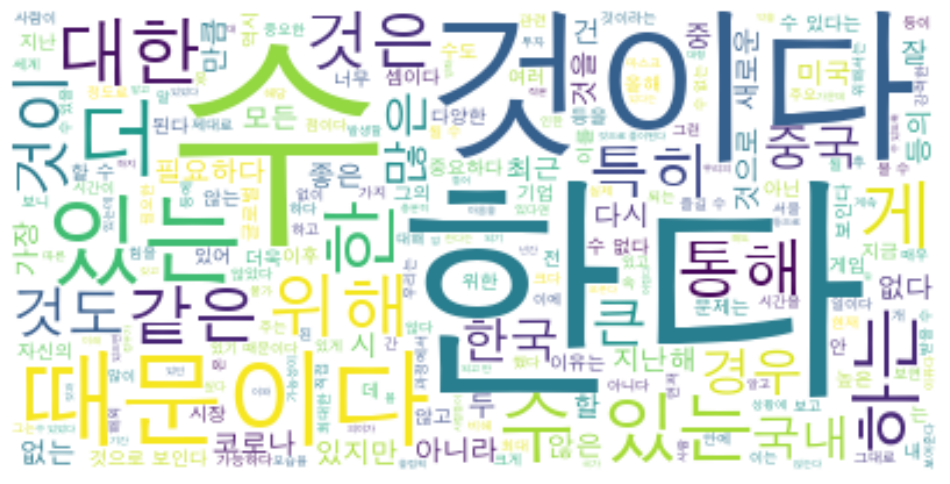

In [49]:
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 전처리

### 문장 살피며 각 유형 특성 파악하기

In [56]:
import random
for ty in types:
    random_idx = random.randint(0, len(type_sort_dict[ty])-1)
    print(f"{ty}: {type_sort_dict[ty]['문장'][random_idx]}")
    # print(f"{ty}: {' '.join(type_sort_dict[ty]['문장'][random_idx].split()[-2:])}")
    

사실형: 상금은 대상 수상작 1,000만 원, 추천 우수작 각 100만 원이다.
추론형: 몇몇 부자를 제외한 대중은 비위생적이고 열악한 공장과 농토에서 새벽부터 밤까지 노동에 시달려야 했다.
예측형: 콘진원은 7개의 하반기 지원 게임을 선정해 총 7억원 규모의 서비스 지원에 나설 방침이다.
대화형: ＂확진된 산모와 신생아가 같은 방에서 지내도 되나?＂


- 특징적, 자주 나오는 단어:
  - 사실형: ~있다, ~했다, ~이다, ~인다, 
  - 추론형: ~야 한다, ~으로 봤다, ~수 있다, ~것이다, ~때문이다, ~지도 모른다
  - 예측형: 전망이다, 있겠다, ~보인다, ~하겠다, ~예정이다, 전망한다, 전망된다, 기대된다
  - 대화형: ~하라, ~입니다, ~습니다, ~바랍니다, 있었죠, 되나, 말이죠, ~일까?
<br><br>

- 문장 끝에 유형의 정보가 많이 심어져 있음 
- 예측형에는 전망, 예정 등의 단어를 잘 포착하도록, 예정이다, 전망한다등의 단어를 어미와 분리시켜야 할것 같다.
- 다른 문장 유형과는 다르게 대화형에는 "다"로 끝나지 않는 문장이 많다.
- 물음표가 나오면 대화형일 가능성이 큼. 무조건적으로 문장부호를 제거하면 안될듯

- 추가로 생각해볼 점
  - 고유명사(미국, 코로나)등을 꼭 분석에 추가할 필요는 없을듯? -> 문장 유형은 문장 전체의 구조에서 판단되기 때문에 
    - 예시: ____에 가면 보통 ____하니까 ____할 것이다.
      - 어떤 단어가 들어와도 예측형이라는 사실은 변하지 않음

## 유형분석

- 유형분석에서는 문장의 종결 어미를 분석하는것이 중요 ([한국어 어미 종류](https://m.blog.naver.com/zzangdol57/30169103790))
- Okt는 어미를 너무 포괄적으로 분석해줌 (Eomi) ([Konlpy tag comparison](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0))
- Kkma는 많이 느림
- Mecab는 속도도 빠르고, 어미도 세밀하게 분석해줌([speed chart](https://konlpy.org/en/v0.4.4/morph/))

|tag|name|
|--|--|
|NNG	|일반 명사|
|NNP	|고유 명사|
|NNB	|의존 명사|
|NNBC|	단위를 나타내는 명사|
|NR	|수사|
|NP	|대명사|
|VV	|동사|
|VA	|형용사
|VX	|보조 용언|
|VCP|	긍정 지정사|
|VCN|	부정 지정사|
|MM	|관형사|
|MAG|	일반 부사|
|MAJ|	접속 부사|
|IC	|감탄사|
|JKS|	주격 조사|
|JKC|	보격 조사|
|JKG|	관형격 조사|
|JKO|	목적격 조사|
|JKB|	부사격 조사|
|JKV|	호격 조사|
|JKQ|	인용격 조사|
|JC	|접속 조사|
|JX	|보조사|
|EP	|선어말어미|
|EF	|종결 어미|
|EC	|연결 어미|
|ETN|	명사형 전성 어미|
|ETM|	관형형 전성 어미|
|XPN|	체언 접두사	|
|XSN|	명사파생 접미사|
|XSV|	동사 파생 접미사|
|XSA|	형용사 파생 접미사|
|XR	|어근|
|SF	|마침표, 물음표, 느낌표|
|SE	|줄임표 …|
|SSO|	여는 괄호 (, [|
|SSC|	닫는 괄호 ), ]|
|SC	|구분자 , · / :|
|SY	|기타 기호|
|SH	|한자|
|SL	|외국어|
|SN	|숫자|

In [35]:
from konlpy.tag import Okt, Mecab
from collections import Counter
sent = '이렇게 눈이 안 오면 우리는 언젠가 ＇눈의 서사(敍事)＇를 잃어버릴지도 모른다.'
Okt().pos(sent)

[('이렇게', 'Adverb'),
 ('눈', 'Noun'),
 ('이', 'Josa'),
 ('안', 'Noun'),
 ('오면', 'Verb'),
 ('우리', 'Noun'),
 ('는', 'Josa'),
 ('언젠가', 'Adverb'),
 ('＇', 'Foreign'),
 ('눈', 'Noun'),
 ('의', 'Josa'),
 ('서사', 'Noun'),
 ('(', 'Punctuation'),
 ('敍事', 'Foreign'),
 (')', 'Punctuation'),
 ('＇', 'Foreign'),
 ('를', 'Noun'),
 ('잃어버릴지도', 'Verb'),
 ('모른다', 'Verb'),
 ('.', 'Punctuation')]

In [38]:
tags = Mecab().pos(sent)
tags
# ' '.join([word_tag[0] for word_tag in tags if word_tag[-1].split('+')[-1][0]=='E'])

[('이렇게', 'MAG'),
 ('눈', 'NNG'),
 ('이', 'JKS'),
 ('안', 'MAG'),
 ('오', 'VV'),
 ('면', 'EC'),
 ('우리', 'NP'),
 ('는', 'JX'),
 ('언젠가', 'MAG'),
 ('＇', 'SY'),
 ('눈', 'NNG'),
 ('의', 'JKG'),
 ('서사', 'NNP'),
 ('(', 'SSO'),
 ('敍事', 'NNG'),
 (')', 'SSC'),
 ('＇', 'SY'),
 ('를', 'JKO'),
 ('잃어버릴지', 'VV+EC'),
 ('도', 'JX'),
 ('모른다', 'VV+EF'),
 ('.', 'SF')]

### 문장 클렌징
- 정규표현식(regex)로 문장 클렌징
- 느낌표, 물음표를 제외한 나머지 문장부호, 숫자, 괄호 안에 있는 부분 제거

In [12]:
import re

sentence = "이것은 한국어 문장입니다. 1234 숫자와 구두점! 을 포함합니다? (this is english text)"

cleaned_sentence = re.sub(r"[^가-힣\s!?]|\(.*?\)", "", sentence)
print(cleaned_sentence)


이것은 한국어 문장입니다  숫자와 구두점! 을 포함합니다?    


In [15]:
# regex 함수
def regex_filter(sentence):
    return re.sub(r"[^가-힣\s!?]|\(.*?\)", "", sentence)

sentence_df['문장'] = sentence_df['문장'].apply(regex_filter)

In [16]:
sentence_df

,ID,문장,유형,극성,시제,확실성,label
0,TRAIN_00000,포인트 금리 인상은 년 이후 년 만에 처음이다,사실형,긍정,현재,확실,사실형-긍정-현재-확실
1,TRAIN_00001,이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
2,TRAIN_00002,정부가 고유가 대응을 위해 월부터 연말까지 유류세 인하 폭을 에서 까지 확대한다,사실형,긍정,미래,확실,사실형-긍정-미래-확실
3,TRAIN_00003,서울시는 올해 월 즉시 견인 유예시간 분을 제공하겠다고 밝혔지만 하루 만에 차도와 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다,사실형,긍정,현재,확실,사실형-긍정-현재-확실
...,...,...,...,...,...,...,...
16536,TRAIN_16536,신동덤은 신비한 동물사전과 해리 포터 시리즈를 잇는 마법 어드벤처물로 전편에 이어 ...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16537,TRAIN_16537,수족냉증은 어릴 때부터 심했으며 관절은 어디 한 곳이 아니고 목 어깨 팔꿈치 등 허...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16538,TRAIN_16538,김금희 소설가는 계약서 조정이 그리 어려운가 작가를 격려한다면서 그런 문구 하나 고...,사실형,긍정,과거,확실,사실형-긍정-과거-확실
16539,TRAIN_16539,만명이 넘는 방문자수를 기록한 이번 전시회는 총 개 작품을 넥슨 사옥을 그대로 구현...,사실형,긍정,과거,불확실,사실형-긍정-과거-불확실


In [18]:
# tokenizer 테스트
from konlpy.tag import Mecab
t = Mecab()
t.pos(sentence_df['문장'][7272], flatten=True)

[('초음속', 'NNG'),
 ('비행', 'NNG'),
 ('으로', 'JKB'),
 ('각종', 'NNG'),
 ('커다란', 'VA+ETM'),
 ('응력', 'NNG'),
 ('스트레스', 'NNG'),
 ('압력', 'NNG'),
 ('에', 'JKB'),
 ('더', 'MAG'),
 ('민감', 'XR'),
 ('한', 'XSA+ETM'),
 ('전투기', 'NNG'),
 ('는', 'JX'),
 ('조립', 'NNG'),
 ('정밀도', 'NNG'),
 ('가', 'JKS'),
 ('높', 'VA'),
 ('을수록', 'EC'),
 ('비행', 'NNG'),
 ('특성', 'NNG'),
 ('에', 'JKB'),
 ('관여', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('변수', 'NNG'),
 ('를', 'JKO'),
 ('최대한', 'MAG'),
 ('줄일', 'VV+ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('기', 'ETN'),
 ('에', 'JKB'),
 ('초', 'XPN'),
 ('정밀', 'NNG'),
 ('조립', 'NNG'),
 ('이', 'JKS'),
 ('가능', 'NNG'),
 ('한', 'XSA+ETM'),
 ('는', 'ETM'),
 ('동체', 'NNG'),
 ('에', 'JKB'),
 ('가해', 'VV+EC'),
 ('지', 'VX'),
 ('는', 'ETM'),
 ('다양', 'XR'),
 ('한', 'XSA+ETM'),
 ('힘', 'NNG'),
 ('으로부터', 'JKB'),
 ('기체', 'NNG'),
 ('를', 'JKO'),
 ('안', 'MAG'),
 ('전하', 'VV'),
 ('게', 'EC'),
 ('지킬', 'VV+ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('다', 'EC')]

## TF_IDF

In [11]:
#Vectorizer에 넣을 custom_tokenizer 출력값 모양 어떤식으로 해야하는 지 확인해보기

# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.stem.porter import PorterStemmer
# import nltk 
# import pandas as pd
# import string
# stemmer = PorterStemmer()
# the_things = [
#         ('items-translated', 'item_name_translated', 50),
#         ('item_categories-translated','item_category_name_translated', 10),
#         ('shops-translated','shop_name_translated', 10)]

# trans_table = {ord(c): None for c in string.punctuation + string.digits}   

# def tokenize(text):
#         # my text was unicode so I had to use the unicode-specific translate function. If your documents are strings, you will need to use a different `translate` function here. `Translated` here just does search-replace. See the trans_table: any matching character in the set is replaced with `None`
#         tokens = [word for word in nltk.word_tokenize(text.translate(trans_table)) if len(word) > 1] #if len(word) > 1 because I only want to retain words that are at least two characters before stemming, although I can't think of any such words that are not also stopwords
#         stems = [stemmer.stem(item) for item in tokens]
#         return stems

# tokenize('hello world!')

- TF-IDF 중요도 수정
  - 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

t = Mecab()

def custom_tokenizer(sentence):
    '''
    각 문장을 Mecab을 이용하여 토큰화해줄 함수
    토큰들을 리스트 형식으로 반환
    '''
    return [token[0] for token in t.pos(sentence)]

In [21]:

vectorizer_tf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=1, max_df=0.8)

corpus = sentence_df['문장'].tolist()
corpus

['포인트 금리 인상은 년 이후 년 만에 처음이다',
 '이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방역 지표가 기준을 충족하면 확진자 격리의무 조정 여부를 검토할 것이라고 전했다',
 '정부가 고유가 대응을 위해 월부터 연말까지 유류세 인하 폭을 에서 까지 확대한다',
 '서울시는 올해 월 즉시 견인 유예시간 분을 제공하겠다고 밝혔지만 하루 만에 차도와 자전거도로는 예외로 하겠다고 입장을 바꾸기도 했다',
 '익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다',
 '이같은 변화를 포함해 올해 종부세 과세 대상은 당초 만명에서 만명으로 줄어든다는 게 정부 추산이다',
 '수수꽃다리과로 북한에서 주로 많이 서식한다는 수수꽃다리 남한의 대표적 라일락으로 털개회나무가 있다',
 '가장 최근에 있었던  예능 프로그램 출연으로 일약 스타덤에 올랐던 한 인플루언서의 명품 가품 착용 논란도 마찬가지 사례다',
 '이번 서비스에는 네이버가 자체 개발한 초대규모  하이퍼클로바 기술이 적용됐다',
 '이 같은 서울시 방침에 직격탄을 맞게 된 곳이 바로 한남근린공원한남동 이다',
 '스탈린에 아부하는 것이 일상이던 권력자들은 스탈린 이후 누가 후계자가 될 것인지를 놓고 온갖 눈치 작전을 벌인다',
 '취약점을 보완하기 위해 무작정 강력한 보안장치를 도입할 수도 없다',
 '비가 내리는 지역에서는 돌풍과 함께 천둥번개가 치고 일부 지역에선 우박이 떨어지는 곳이 있을 예정이다',
 '최근 대 이상의 서울 강남 거주자들 중심으로 번지고 있는 국민연금 고액 추후납부추납 이들은 평소 국민연금을 내지 않고 있다가 연금수령 시점이 돼서 만억원의 보험료를 한꺼번에 투척하면서 이득을 취한다',
 '이어 개별 상황에 어떻게 응대해야 할 것인지도 모호한 상황이라며 이 같은 부분도 정리 작업이 필요하다고 말했다',
 '사우스포게임즈가 개발한 스컬의 경우도 지난해 부산인디커넥트 페스티벌 글로벌인디게임제작경진대회 등을 통해 눈도장을 찍기도 했다'

In [22]:
X = vectorizer_tf.fit_transform(corpus)

In [23]:
for i in vectorizer_tf.get_feature_names_out().tolist():
    print(i)

!
?
가
가가호호
가감
가게
가격
가격대
가결
가계
가곡
가공
가관
가교
가구
가그린
가금
가급적
가까스로
가까우
가까운
가까운데
가까울
가까움
가까워
가까워질
가까웠
가까이
가깝
가꾸
가꾼다는
가꿔
가끔
가나아트
가난
가늘
가늠
가늠자
가능
가다듬
가닥
가담
가담자
가닿
가덕도
가도
가동
가동률
가두
가둔
가둘
가둬
가득
가든
가디언
가뜩이나
가랑잎
가래떡
가량
가려
가려움
가려움증
가련
가렴
가렸
가령
가로
가로등
가로막
가로세로
가로수
가로질러
가로채
가루
가르
가르마
가르쳐
가르치
가르칠
가르침
가를
가름
가리
가리비
가리켜
가리키
가리킨다
가린다
가릴
가마
가마솥
가마우지
가만히
가맹
가맹점
가면라이더
가문
가물
가뭄
가미
가방
가벼운
가벼움
가벼이
가변
가볍
가보
가부좌
가쁘
가쁜
가사
가산
가산세
가상
가상현실
가섭
가성
가세
가셈
가셰
가속
가속기
가속도
가솔린
가솔린차
가수
가스
가스공사
가스펠
가슴
가슴살
가시
가시거리
가시나
가시밭길
가압
가액
가야
가양
가업
가엾
가영
가옥
가온
가와바타
가와사키
가요
가요대전
가용
가용성
가운데
가위질
가을
가의대부
가이드
가이드라인
가이아
가이즈
가입
가입비
가입자
가장
가장자리
가전
가정
가정생활
가정제
가져
가져가
가져간
가져갈
가져갔
가져다
가져다가
가져다준다
가져다줄
가져도
가져라
가져오
가져온
가져올
가져와
가져와서
가져왔
가졌
가족
가족사
가죽
가중
가지
가지런
가지런히
가진
가진다
가진다고
가질
가질수록
가짐
가집
가짓수
가짜
가차
가창력
가책
가처분
가천
가축
가출
가치
가치관
가칭
가타
가토
가톨릭
가파
가파르
가파른
가팔라서
가팔랐
가평
가품
가풍
가하
가한
가한다
가할
가해
가해자
가해질
가했
가형
가혹
가히
각
각각
각계
각계각층
각광
각국
각급
각기
각도
각료
각막
각막염
각박
각별
각별히
각본
각본가
각본상
각색상
각서
각설
각성
각성제
각양각색
각오
각인
각자
각종
각지
각질
각질화
각축
각축전
각층
각하
각해
각화
간
간간이
간간히
간격
간곡히
간과
간구
간극
간년
간다


In [44]:
X.shape

(16541, 200117)

In [24]:
corpus_X = pd.DataFrame(X.toarray(), columns=vectorizer_tf.get_feature_names_out())
corpus_X

,!,?,가,가가호호,가감,가게,가격,가격대,가결,가계,...,힘센,힘써야,힘썼,힘썼으며,힘쓰,힘쓸,힘없이,힘입,힘차,힙
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.068230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.196372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16536,0.0,0.0,0.058921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16537,0.0,0.0,0.048148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16538,0.0,0.0,0.055079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16539,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 각 문장에서 컬럼 값이 0이 아닌 갯수
corpus_X.astype(bool).sum(axis=1)

0        11
1        41
2        17
3        31
4        18
         ..
16536    35
16537    49
16538    33
16539    31
16540     5
Length: 16541, dtype: int64

In [26]:
vectorizer_tf.transform(['그럴 것 같습니다'])

<1x26090 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

## 데이터 나누기

In [31]:
from sklearn.model_selection import train_test_split

corpus_y = sentence_df['유형']

X_train, X_valid, y_train, y_valid = train_test_split(corpus_X, corpus_y, test_size=0.2, random_state=13, stratify=corpus_y)
X_train.shape, y_train.shape

((13232, 26090), (13232,))

In [ ]:
# # PCA
# from sklearn.decomposition import SparsePCA

# pca = SparsePCA(n_components=3)
# pca.fit(corpus_X)

# transformed_corpus_X = pca.transform(corpus_X)

In [32]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

## 성능 측정

In [34]:
from sklearn.metrics import accuracy_score
pred = naive.predict(X_valid)
accuracy_score(pred, y_valid)


0.8192807494711393

In [46]:
wrong_answer_idx = []
for i in range(len(pred)):
    if pred[i] != y_valid.iloc[i]:
        
        print(f"문장: {i} - {sentence_df.iloc[i]['문장']}")
        print(f"정답: {y_valid.iloc[i]}")
        print(f"예측: {pred[i]}")
        print()
        wrong_answer_idx.append(i)




문장: 1 - 이어 앞으로 전문가들과 함께 주 단위로 상황을 재평가할 예정이라며 그 이전이라도 방역 지표가 기준을 충족하면 확진자 격리의무 조정 여부를 검토할 것이라고 전했다
정답: 추론형
예측: 사실형

문장: 5 - 이같은 변화를 포함해 올해 종부세 과세 대상은 당초 만명에서 만명으로 줄어든다는 게 정부 추산이다
정답: 추론형
예측: 사실형

문장: 19 - 교리를 중시하는 보수주의자와 세상의 변화를 받아들이자는 진보주의자는 사사건건 의견 충돌을 빚지만 결국 가톨릭 전체를 위해 각자 어떤 역할을 해야 하는지에 대해 합의를 이루고 두 사람은 서로를 위해 기도해주는 친구가 된다
정답: 추론형
예측: 사실형

문장: 22 - 능양군이 막 문을 나서자 김류의 부인이 나와 지난 밤 꿈에 어가가 집을 나가는 것을 보았는데 곤룡포를 입은 분이 아까 오셨던 젊은 분이라고 귀띔했다
정답: 추론형
예측: 사실형

문장: 25 - 양 지사는 해양 생태 복원 한국형 해양치유산업 해양바이오산업 해양레저관광산업을 전략적으로 추진해 일자리 만개 기업 개 생산 조원 유발 관광객 연 만명 방문 등을 목표로 세웠다고 밝혔다
정답: 추론형
예측: 사실형

문장: 26 - 해당 시민은 김현미 의원님 고양시 안망쳐 졌어요 고양시라고 말하자 김 장관은 그동안 동네 물이 많이 나빠졌네라고 말했다
정답: 추론형
예측: 사실형

문장: 32 - 팔각정은 관광도로로 유명한 북악 스카이웨이로 인근에 있어 이륜차 운전자들이 즐겨 찾는 장소로 꼽힌다
정답: 추론형
예측: 사실형

문장: 34 - 이번 폐간에는 유튜브 페이스북 등 모바일 디지털 플랫폼의 부상이 크게 작용했다
정답: 추론형
예측: 사실형

문장: 41 - 구강 관리 역시 중요하다
정답: 대화형
예측: 사실형

문장: 45 - 월드 오브 드래곤네스트는 오는 일 말레이시아 싱가포르 인도네시아 필리핀 태국 등 개 국가에 동시 출시될 예정이며 감마니아를 통해 대만 지역 출시도 준비 중이다
정답: 추론형
예측: 사실형

문장: 54 - 봄이 오면 봄 상

In [42]:
wrong_answer_idx

[1, 5, 19, 22, 25, 26, 32, 34]